In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import cv2
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from PIL import Image as im
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
%matplotlib inline

In [91]:
#loading the dataset from tensorflow repo
(x_train, y_train), (x_test,y_test) = cifar10.load_data()


In [92]:
#checking the shapes and dimension of the images

print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

print("x_train type = ", type(x_train))

x_train shape =  (50000, 32, 32, 3)
y_train shape =  (50000, 1)
x_test shape =  (10000, 32, 32, 3)
y_test shape =  (10000, 1)
x_train type =  <class 'numpy.ndarray'>


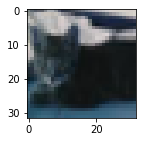

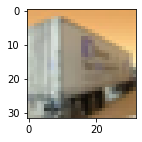

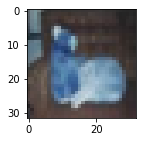

In [93]:
#printing sample images
def print_image(img):
    image = im.fromarray(img)
    image.save('sample.png')
    img = cv2.imread("sample.png")
    plt.figure(figsize= (2,2))
    plt.imshow(img)
    plt.show()
    
img1 = x_train[9]
img2 = x_train[15]
img3 = x_train [17]

print_image(img1)
print_image(img2)
print_image(img3)


In [94]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

x_train = x_train.numpy()
x_test = x_test.numpy()

x_train = x_train.reshape((50000,32,32))
x_test = x_test.reshape((10000,32,32))




In [95]:
class FC_Autoencoder(Model):
    def __init__(self, dim):
        super(FC_Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([Flatten(), Dense(dim, activation = 'relu')])
        self.decoder = tf.keras.Sequential([Dense(1024, activation = 'relu'), tf.keras.layers.Reshape((32,32))])
        
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        

In [96]:
autoencoder32 = FC_Autoencoder(32)
autoencoder64 = FC_Autoencoder(64)
autoencoder128 = FC_Autoencoder(128)
autoencoder512 = FC_Autoencoder(512)




In [97]:
checkpoint_path = "training_32/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [98]:
autoencoder32.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics= ['MSE'])
History32 = autoencoder32.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[cp_callback])





Epoch 1/10
1563/1563 [==============================] - 3s 1ms/step - loss: 0.0539 - MSE: 0.0539 - val_loss: 0.0197 - val_MSE: 0.0197

Epoch 00001: saving model to training_32\cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0185 - MSE: 0.0185 - val_loss: 0.0171 - val_MSE: 0.0171

Epoch 00002: saving model to training_32\cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0168 - MSE: 0.0168 - val_loss: 0.0166 - val_MSE: 0.0166

Epoch 00003: saving model to training_32\cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0164 - MSE: 0.0164 - val_loss: 0.0166 - val_MSE: 0.0166

Epoch 00004: saving model to training_32\cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0164 - MSE: 0.0164 - val_loss: 0.0164 - val_MSE: 0.0164

Epoch 00005: saving model to training_32\cp.ckpt
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.01

In [99]:
checkpoint_path = "training_64/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

autoencoder64.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics= ['MSE'])
History64 = autoencoder64.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - 3s 1ms/step - loss: 0.0477 - MSE: 0.0477 - val_loss: 0.0158 - val_MSE: 0.0158

Epoch 00001: saving model to training_64\cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0151 - MSE: 0.0151 - val_loss: 0.0137 - val_MSE: 0.0137

Epoch 00002: saving model to training_64\cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0134 - MSE: 0.0134 - val_loss: 0.0133 - val_MSE: 0.0133

Epoch 00003: saving model to training_64\cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0132 - MSE: 0.0132 - val_loss: 0.0132 - val_MSE: 0.0132

Epoch 00004: saving model to training_64\cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0131 - MSE: 0.0131 - val_loss: 0.0132 - val_MSE: 0.0132

Epoch 00005: saving model to training_64\cp.ckpt
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.01

In [100]:
checkpoint_path = "training_128/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
autoencoder128.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics= ['MSE'])
History128 = autoencoder128.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0372 - MSE: 0.0372 - val_loss: 0.0126 - val_MSE: 0.0126

Epoch 00001: saving model to training_128\cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0115 - MSE: 0.0115 - val_loss: 0.0105 - val_MSE: 0.0105

Epoch 00002: saving model to training_128\cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0103 - MSE: 0.0103 - val_loss: 0.0103 - val_MSE: 0.0103

Epoch 00003: saving model to training_128\cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0102 - MSE: 0.0102 - val_loss: 0.0101 - val_MSE: 0.0101

Epoch 00004: saving model to training_128\cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0100 - MSE: 0.0100 - val_loss: 0.0101 - val_MSE: 0.0101

Epoch 00005: saving model to training_128\cp.ckpt
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss:

In [101]:
checkpoint_path = "training_512/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
autoencoder512.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics= ['MSE'])
History512 = autoencoder512.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0267 - MSE: 0.0267 - val_loss: 0.0089 - val_MSE: 0.0089

Epoch 00001: saving model to training_512\cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0082 - MSE: 0.0082 - val_loss: 0.0071 - val_MSE: 0.0071

Epoch 00002: saving model to training_512\cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0067 - val_MSE: 0.0067

Epoch 00003: saving model to training_512\cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0065 - MSE: 0.0065 - val_loss: 0.0065 - val_MSE: 0.0065

Epoch 00004: saving model to training_512\cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0063 - MSE: 0.0063 - val_loss: 0.0063 - val_MSE: 0.0063

Epoch 00005: saving model to training_512\cp.ckpt
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step -

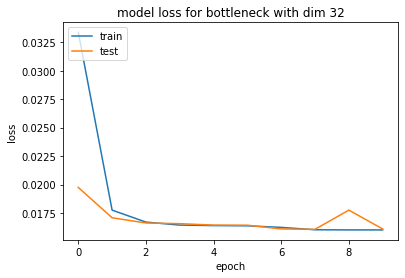

<Figure size 432x288 with 0 Axes>

In [102]:
plt.plot(History32.history['loss'])
plt.plot(History32.history['val_loss'])
plt.title('model loss for bottleneck with dim 32')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('a32.jpg')

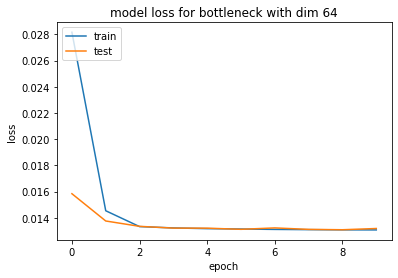

<Figure size 432x288 with 0 Axes>

In [103]:
plt.plot(History64.history['loss'])
plt.plot(History64.history['val_loss'])
plt.title('model loss for bottleneck with dim 64')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('a64.jpg')

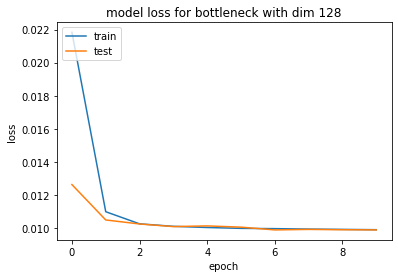

<Figure size 432x288 with 0 Axes>

In [104]:
plt.plot(History128.history['loss'])
plt.plot(History128.history['val_loss'])
plt.title('model loss for bottleneck with dim 128')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('a128.jpg')

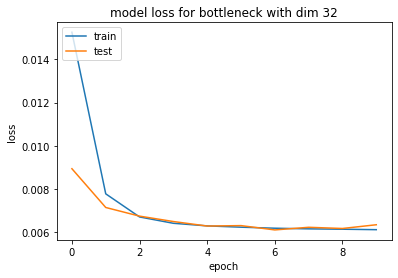

<Figure size 432x288 with 0 Axes>

In [105]:
plt.plot(History512.history['loss'])
plt.plot(History512.history['val_loss'])
plt.title('model loss for bottleneck with dim 32')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('a32.jpg')

tf.Tensor(0.62096214, shape=(), dtype=float32)


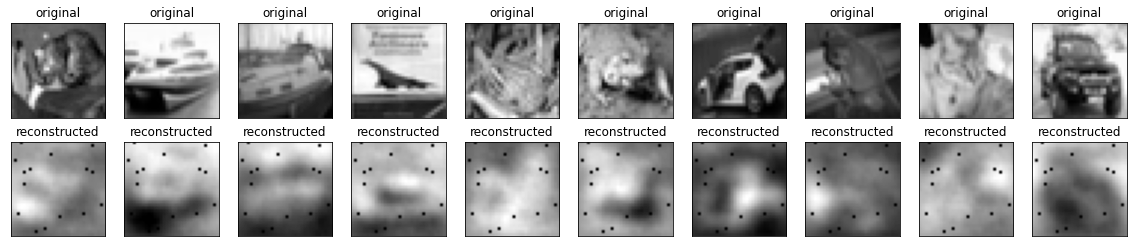

In [106]:
encoded_imgs = autoencoder32.encoder(x_test).numpy()
decoded_imgs = autoencoder32.decoder(encoded_imgs).numpy()

loss = tf.keras.losses.MSE(decoded_imgs[1],x_test[1])
loss = sum(loss)
print(loss)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



tf.Tensor(0.5279885, shape=(), dtype=float32)


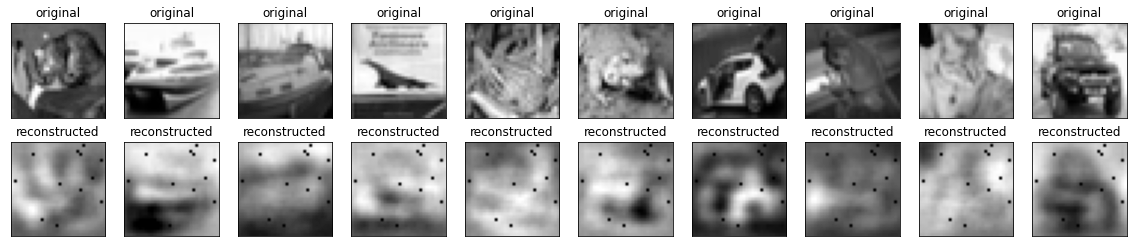

In [107]:
encoded_imgs = autoencoder64.encoder(x_test).numpy()
decoded_imgs = autoencoder64.decoder(encoded_imgs).numpy()

loss = tf.keras.losses.MSE(decoded_imgs[1],x_test[1])
loss = sum(loss)
print(loss)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

tf.Tensor(0.45552495, shape=(), dtype=float32)


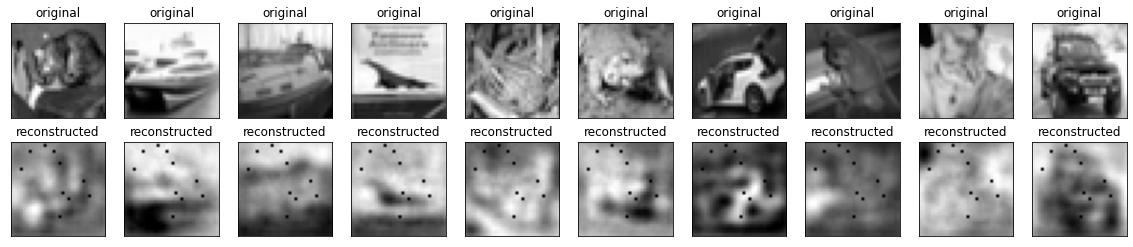

In [108]:
encoded_imgs = autoencoder128.encoder(x_test).numpy()
decoded_imgs = autoencoder128.decoder(encoded_imgs).numpy()

loss = tf.keras.losses.MSE(decoded_imgs[1],x_test[1])
loss = sum(loss)
print(loss)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

tf.Tensor(0.25856227, shape=(), dtype=float32)


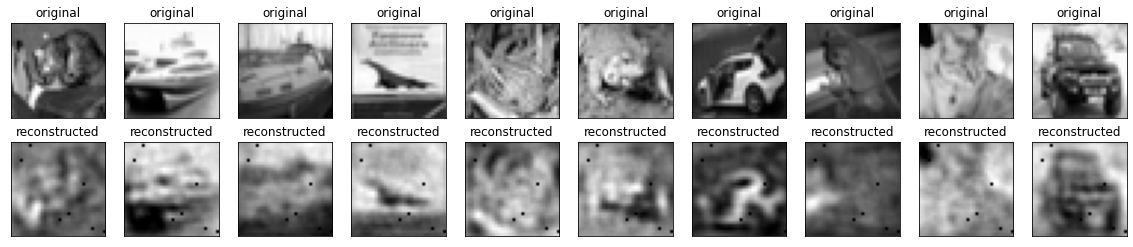

In [109]:
encoded_imgs = autoencoder512.encoder(x_test).numpy()
decoded_imgs = autoencoder512.decoder(encoded_imgs).numpy()

loss = tf.keras.losses.MSE(decoded_imgs[1],x_test[1])
loss = sum(loss)
print(loss)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

I tried running the Autoencoder with 4 different bottleneck sizes : (32, 64,
128, 512)

Train and test loss for each autoencoder model ( 32,64,128,512) have been 
plotted above

From the reconstructed images of each moel it is very clear that as the 
dimension of the bottleneck    increases the quality of reconstructed 
image increases too. In this case, we see that the image encoded using 
bottleneck size of 32 and 64 have really bad quality of reconstructed 
image but the image encoded using bottleneck size of 512 have relatively 
better quality of reconstructed image. Therefore, the rational behing 
chosing the right bottleneck size depends on the trade off between the 
quality of reconstructed image and the compression of the image. More 
specifically, if we want to compress/encode the image to really smaller 
size then that will happen at the cost of qualty of reconstucted image 
whereas if we do not hevaily compress/encode then the reconstructed image 
will have relatively better quality. In this case we see that an image of 
size 1024 when not hevail decoded/compressed to half its size ( 512 ) the 
reconstructed image turned out to be of relavitly better quality.

From  my observation, the classes of dog, frog and cat are the classes that
are relatively more difficult to encode than other classes. This maybe because
the color intensity of foreground and background in images from these classes 
are on a more or less the same level when compared t other classes.
